In [ ]:
!pip install konlpy

In [ ]:
import json
import re

from konlpy.tag import Okt

from collections import Counter

import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [ ]:
okt= Okt()
okt

In [ ]:
words = '잎새에 이는 바람에도 나는 괴로워했다.'

In [ ]:
noun_list =okt.nouns(words)
noun_list

['잎새', '바람', '나']

In [ ]:
count = Counter(noun_list)
count

Counter({'나': 1, '바람': 1, '잎새': 1})

In [ ]:
count.most_common(2)

[('잎새', 1), ('바람', 1)]

In [ ]:
news ='''출제 오류 논란이 일었던 2022학년도 대학수학능력시험 생명과학Ⅱ 20번 문제에 대해 법원이 출제 오류가 맞다고 결론 냈다.

서울행정법원 행정6부(부장 이주영)는 15일 오후 2시 수능 응시자 김모 씨 등 92명이 한국교육과정평가원을 상대로 낸 정답 결정 처분 취소소송에서 원고 승소 판결했다.

당초 예정됐던 선고일은 이달 17일이었지만, 재판부는 입학전형에 미치는 영향 등을 고려해 선고일을 이날로 앞당겼다. 또한 이번 재판은 행정소송으로는 이례적으로 지난 10일 한 차례 변론기일만 열고 바로 결론을 냈다.

이번 재판 결과에 대한 정부 당국의 불복으로 항소심 재판까지 갈 가능성도 배제할 수 없다. 과거 2014학년도 수능 세계지리 8번 문항 오류 논란도 1년 뒤 항소심까지 재판이 이어지며 장기화되기도 했다.

논란이 된 생명과학Ⅱ 20번 문항은 집단Ⅰ과 집단Ⅱ 중 하디·바인베르크 평형이 유지되는 집단을 찾고 ‘보기’ 진위를 판단하는 문항이다. 하지만 문제에 주어진 값으로 특정 개체수가 0보다 작은 음수(-)가 나오면서 출제 오류라는 지적이 제기됐다. 정답에서 제외해야 하는 음수 개체수가 나왔고, 같은 논리가 2015학년도 수능에서도 나왔다는 게 수험생들의 주장이다. 또 수험생들은 문제 오류로 시간이 지체되는 등 피해를 입었다고도 주장했다.

반면 평가원 측은 지난달 29일 문제에 이상이 없다고 판정했다. 평가원 측은 “이 문항의 조건이 완전하지 않다고 해도 학업 성취 수준을 변별하기 위한 평가 문항으로서 타당성이 유지된다”고 맞섰다.

논란이 지속되자 교육부는 한국대학교육협의회와 협의를 거쳐 수시 합격자 발표일을 이달 18일로 연기했다. 이에 따라 수시 합격자 등록일은 이달 17~20일에서 18~21일로, 수시 미등록 충원 기간은 이달 21~27일에서 22~28일로 하루씩 늦춰졌다. 교육 당국은 수험생의 혼란을 막기 위해 재판부가 앞당긴 선고 일정과 상관없이 연기된 일정을 유지할 방침이다. 평가원은 지난 10일 배부한 수능성적표에도 생명과학II 응시생 6515명의 해당 과목 성적을 공란으로 표시했다.'''

In [ ]:
noun_list2 =okt.nouns(news)
noun_list2

['출제',
 '오류',
 '논란',
 '학년',
 '대학',
 '수학',
 '능력',
 '시험',
 '생명과학',
 '번',
 '문제',
 '대해',
 '법원',
 '출제',
 '오류',
 '결론',
 '서울',
 '행정법원',
 '행정',
 '부',
 '부장',
 '이주영',
 '오후',
 '수능',
 '응시',
 '김모',
 '씨',
 '등',
 '명',
 '한국',
 '교육과정평가원',
 '상대로',
 '정답',
 '결정',
 '처분',
 '취소소송',
 '원고',
 '승소',
 '판결',
 '당초',
 '예정',
 '선고',
 '일',
 '달',
 '재판',
 '입학',
 '전형',
 '영향',
 '등',
 '고려',
 '선고',
 '일',
 '날로',
 '또한',
 '이번',
 '재판',
 '행정소송',
 '이례',
 '지난',
 '차례',
 '변론기일',
 '바로',
 '결론',
 '이번',
 '재판',
 '결과',
 '대한',
 '정부',
 '당국',
 '불복',
 '항소심',
 '재판',
 '가능성',
 '배제',
 '수',
 '과거',
 '학년',
 '수능',
 '세계',
 '지리',
 '번',
 '문항',
 '오류',
 '논란',
 '뒤',
 '항소심',
 '재판',
 '장기',
 '기도',
 '논란',
 '생명과학',
 '번',
 '문항',
 '집단',
 '과',
 '집단',
 '중',
 '하디',
 '바인',
 '베르크',
 '평형',
 '유지',
 '집단',
 '보기',
 '진위',
 '판단',
 '문항',
 '문제',
 '값',
 '특정',
 '개체',
 '수가',
 '음수',
 '출제',
 '오류',
 '지적',
 '제기',
 '정답',
 '제외',
 '음수',
 '개체',
 '수가',
 '논리',
 '학년',
 '수능',
 '게',
 '수험생',
 '주장',
 '또',
 '수험생',
 '문제',
 '오류로',
 '시간',
 '지체',
 '등',
 '피해',
 '주장',
 '반면',
 '평가원',
 '측은',
 '지난달',
 '문제

In [ ]:
count2 = Counter(noun_list2)
count2

Counter({'가능성': 1,
         '값': 1,
         '개체': 2,
         '게': 1,
         '결과': 1,
         '결론': 2,
         '결정': 1,
         '고': 1,
         '고려': 1,
         '공란': 1,
         '과': 1,
         '과거': 1,
         '과목': 1,
         '교육': 1,
         '교육과정평가원': 1,
         '교육부': 1,
         '기간': 1,
         '기도': 1,
         '김모': 1,
         '날로': 1,
         '논란': 4,
         '논리': 1,
         '능력': 1,
         '달': 4,
         '당국': 2,
         '당초': 1,
         '대학': 1,
         '대학교육': 1,
         '대한': 1,
         '대해': 1,
         '뒤': 1,
         '등': 3,
         '등록': 1,
         '또': 1,
         '또한': 1,
         '명': 1,
         '명의': 1,
         '문제': 4,
         '문항': 5,
         '미등록': 1,
         '바로': 1,
         '바인': 1,
         '반면': 1,
         '발표': 1,
         '방침': 1,
         '배부': 1,
         '배제': 1,
         '번': 3,
         '법원': 1,
         '베르크': 1,
         '변론기일': 1,
         '변별': 1,
         '보기': 1,
         '부': 1,
         '부가': 1,
        

In [ ]:
count2.most_common(15)

[('재판', 6),
 ('문항', 5),
 ('오류', 4),
 ('논란', 4),
 ('문제', 4),
 ('수능', 4),
 ('일', 4),
 ('달', 4),
 ('출제', 3),
 ('학년', 3),
 ('생명과학', 3),
 ('번', 3),
 ('등', 3),
 ('선고', 3),
 ('집단', 3)]

In [ ]:
word_count = {}
for tag,count2 in count2.most_common(15):
  if(len(str(tag))>1) :
    word_count[tag] = count2
word_count

{'논란': 4,
 '문제': 4,
 '문항': 5,
 '생명과학': 3,
 '선고': 3,
 '수능': 4,
 '오류': 4,
 '재판': 6,
 '집단': 3,
 '출제': 3,
 '학년': 3}

In [ ]:
# xml -> <money>1000<money>
# Extensible Markup Language (확장가능한 ML)

# json -> {noney : 1000}
# Javascript Object Notation

In [ ]:
file_name='/content/etnews.kr_facebook_2016-01-01_2018-08-01_4차 산업혁명.json'
json_data = json.loads(open(file_name, 'r', encoding='utf-8').read())
# 읽기 stream = 'r', 쓰기 stream

json_data

[{'created_time': '2018-06-20 18:06:39',
  'link': 'https://www.facebook.com/etnews.kr/videos/1981346601899735/',
  'message': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"\n\n스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고, 그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴, 지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다.\n\n6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고, 조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다.',
  'name': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"',
  'post_id': '407886705912407_1981346601899735',
  'total_comments': 3},
 {'created_time': '2018-06-14 10:41:16',
  'link': 'http://www.etnews.com/20180612000347',
  'message': '로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다.',
  'name': '기술력 갖춘 로봇기업 몸값 치솟는다',
  'post_id': '407886705912407_1971252229575839',
  'total_comments': 0},
 {'created_time': '2018-04-10 17:42:00',
  'link': 'http://www.etnews.com/20180409000360?mc=em_002_00001',
  'message': '4차 산업혁명 시대 금융 산업 전반 점검해야 한다는...',
  'name': "휘청거리는 대한민국 '금융'...서민도 기업도 ICT도 실종",
  'post_id': '

In [ ]:
all_data = ''
for item in json_data : 
  if 'message' in item.keys() :
    all_data = all_data + re.sub(r'[^\w]',' ', item['message']) + " "
print(all_data)

6월의 스파크포럼    미래 시대  조직의 변화도 시작됐다    스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고  그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴  지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다   6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고  조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다  로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다  4차 산업혁명 시대 금융 산업 전반 점검해야 한다는    공통 간판 공약은  4차 산업혁명 선도 도시 구현 과  가상화폐 블록체인 기술 활용  등입니다  https   goo gl qPEyAJ 이번 과정은 4차 산업혁명 핵심 기술인 AI에 대한 통찰력과 알파고를 통해 우리 일상과 익숙해진 로봇  빅데이터 산업 흐름을 알려줍니다   인공지능  최고위과정  산학연최고전문가 https   goo gl jSZSNX 4차 산업혁명 모든 기술과 서비스 구현 산업혁명의 나라  영국엔 4차 산업혁명이 없다  한국 영국 경험과 지혜를 모으는  미래비즈니스포럼 2017  개최  전자신문TV 라이브  SBA 신직업위크  4차 산업혁명 시대의 경쟁력 확보와 일자리 창출의 해법을 신직업에서 찾고 있는 서울산업진흥원 SBA 이 자신들의 역량과 노력을 모두 담은  제 2회 신직업위크 를 진행하고 있습니다   이번 전자신문TV라이브는 서울 대치동 SBA 신직업교육센터에서 강만구 신직업교육팀장과 서지윤 신직업리서치팀수석  윤석원 테스트웍스 대표 등과 함께  제 2회 신직업위크 와 최신 신직업트렌드를 알아보는 시간으로 마련했습니다  많은 시청 바랍니다     전자신문  전자신문엔터  전자신문TV  라이브  소셜방송  현장라이브  손보련  신직업위크  서울산업진흥원  SBA  신직업  서울  강만구  서지윤  윤석원  테스트웍스  소프트웨

In [ ]:
# 명사 단어 추출
# 카운트 딕셔너리 확인
# 10위 확인
noun = okt.nouns(all_data)

In [ ]:
count3 = Counter(noun)
count3

Counter({'가상': 1,
         '가상현실': 1,
         '가장': 2,
         '간판': 1,
         '강': 2,
         '강남구': 1,
         '강연': 1,
         '강의': 1,
         '강점': 1,
         '강조': 1,
         '강추': 1,
         '개념': 1,
         '개막': 1,
         '개최': 1,
         '개편': 1,
         '개혁': 1,
         '거리': 1,
         '격인': 1,
         '경쟁력': 2,
         '경제': 1,
         '경험': 1,
         '공공기관': 2,
         '공무원': 1,
         '공약': 1,
         '공통': 1,
         '과': 1,
         '과정': 2,
         '과제': 2,
         '과학기술': 1,
         '관련': 1,
         '관심': 1,
         '광운대': 1,
         '교수': 1,
         '교육': 2,
         '교차': 1,
         '구글': 1,
         '구현': 2,
         '국내': 2,
         '국면': 1,
         '국정': 2,
         '그': 1,
         '금융': 1,
         '급': 1,
         '기대': 1,
         '기술': 8,
         '기업': 3,
         '꼽': 1,
         '나라': 1,
         '노력': 3,
         '논의': 1,
         '다림': 1,
         '다보스': 1,
         '대비': 2,
         '대선': 1,
         '대응': 3,
    

In [ ]:
word_count3 = dict()
for tag, count in count3.most_common(10):
    if(len(str(tag)) > 1):
        word_count2[tag] = count
word_count3

{'기술': 8,
 '라이브': 7,
 '산업': 10,
 '산업혁명': 22,
 '시대': 7,
 '이번': 6,
 '전자신문': 13,
 '직업': 10,
 '진흥': 6}

In [ ]:
# colab에 한글 폰트 설치 

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf



In [ ]:
plt.rc('font', family = 'NanumGothic')

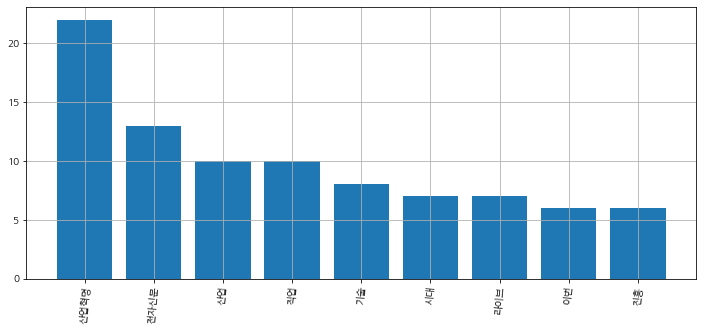

In [ ]:
plt.figure(figsize=(12,5))
plt.xlabel='키워드'
plt.ylabel='빈도수'
plt.grid(True)


plt.bar(range(len(word_count3)), word_count3.values())
plt.xticks(range(len(word_count3)), word_count3.keys(), rotation ='85')
plt.show()

In [ ]:
file_mk ='/content/www.mk.co.kr-rss-40300001-.json'
mk_rss = json.loads(open(file_mk, 'r', encoding='utf-8-sig').read())
# 읽기 stream = 'r', 쓰기 stream

mk_rss

{'feed': {'author': '',
  'description': '매일경제 : 전체뉴스',
  'image': '',
  'link': 'https://www.mk.co.kr/',
  'title': '매일경제 : 전체뉴스',
  'url': 'https://www.mk.co.kr/rss/40300001/'},
 'items': [{'author': '매일경제',
   'categories': ['전체뉴스'],
   'content': '윤석열 국민의힘 대선 후보 부인인 김건희 코바나컨텐츠 대표는 15일 국민 여러분께 심려를 끼쳐 드린 점에 대해 사과할 의향이 있다고 밝혔다.김 대표는 이날 서울 서초구 코바나컨텐츠 사무실 앞에서 연합뉴스 ..',
   'description': '윤석열 국민의힘 대선 후보 부인인 김건희 코바나컨텐츠 대표는 15일 국민 여러분께 심려를 끼쳐 드린 점에 대해 사과할 의향이 있다고 밝혔다.김 대표는 이날 서울 서초구 코바나컨텐츠 사무실 앞에서 연합뉴스 ..',
   'enclosure': {},
   'guid': '3afdd80877b1b6e0b9853d6392382c56',
   'link': 'https://www.mk.co.kr/news/politics/view/2021/12/1138011/',
   'pubDate': '2021-12-15 06:31:28',
   'thumbnail': '',
   'title': '김건희 "국민께 심려끼쳐…사과 의향 있다"'},
  {'author': '매일경제',
   'categories': ['전체뉴스'],
   'content': '자신의 부인과 바람을 피웠던 남성과 다투는 과정에서 급소를 때려 숨지게 한 40대 남성이 징역 2년을 선고받았다.광주지법 형사12부(노재호 부장판사)는 폭행치사 혐의로 재판에 넘겨진 A(48)씨에게 징역 2년을 ..',
   'description': '자신의 부인과 바람을 피웠던 남성과 다투는 과정에서 급소를 때려 숨지게 한 40대 남성이 징

In [ ]:
mk_data = mk_rss['items']
mk_article=''
for item in mk_data :
  if 'content' in item.keys() :
    mk_article = mk_article + re.sub(r'[^\w]',' ', item['content']) + " "
print(mk_article)

윤석열 국민의힘 대선 후보 부인인 김건희 코바나컨텐츠 대표는 15일 국민 여러분께 심려를 끼쳐 드린 점에 대해 사과할 의향이 있다고 밝혔다 김 대표는 이날 서울 서초구 코바나컨텐츠 사무실 앞에서 연합뉴스    자신의 부인과 바람을 피웠던 남성과 다투는 과정에서 급소를 때려 숨지게 한 40대 남성이 징역 2년을 선고받았다 광주지법 형사12부 노재호 부장판사 는 폭행치사 혐의로 재판에 넘겨진 A 48 씨에게 징역 2년을     현금 2억만 있으면 A재개발 구역 내집 마련 가능    B재개발 빌라 매물 강추 조합원 자격 취득  오세훈 표 신속통합기획 재개발 공모가 시민들의 높은 호응 속에 흥행 가도를 달리고 있는 가운데 시장 과열을 부    김현정 매경닷컴 기자    매일경제  amp  mk co kr  무단전재 및 재배포 금지  15일 2022학년도 대학수학능력시험 수능  출제오류가 법정에서 인정되면서 출제기관인 한국교육과정평가원이 생명과학Ⅱ 20번 문항을 전원 정답 처리해 채점한 성적을 오후 6시부터 제공한다     평가원은 이번    정부는 15일 유진규 울산경찰청장을 인천경찰청장으로  최승렬 강원경찰청장을 경기남부경찰청장으로 내정하는 등 치안정감 인사를 단행했다     윤희근 경찰청 자치경찰협력정책관  유재성 경찰청 과학수사관리   라임자산운용 이하 라임  관련 로비 혐의가 1심에서 유죄로 인정돼 징역 3년의 실형을 선고받은 윤갑근 전 고검장이 항소심에서 무죄를 선고받고 석방됐다     서울고법 형사1 1부 이승련 엄상필 심담 부장판사    청와대가 더불어민주당 이재명 대선후보가 제안한 다주택자 양도세 중과의 한시적 유예 방안과 관련해 민주당 측에 반대 입장을 전달했다      여당 대선후보의 정책 제안에 대해 청와대가 거듭 제동을 거는 모양   최근 메타버스와 대체불가토큰 NFT  관련 종목들이 고점을 찍고 하락세를 보이고 있다  관련 테마 상품인 ETF 역시 수익률이 갈수록 떨어지고 있다 15일 한국거래소에 따르면 대표적인 메타버스 관련주인 위지윅스튜  

In [ ]:
noun_article = okt.nouns(mk_article)

In [ ]:
# noun_article

In [ ]:
count4 = Counter(noun_article)

In [ ]:
# count4

In [ ]:
word_count4 =dict()
for tag, count in count4.most_common(15):
  if (len(str(tag))>1) :
    word_count4[tag] = count
word_count4



{'경찰청장': 4,
 '관련': 5,
 '국민': 2,
 '대선': 3,
 '대표': 3,
 '대해': 3,
 '선고': 3,
 '재개발': 3,
 '징역': 3,
 '컨텐츠': 2,
 '코바': 2,
 '후보': 3}

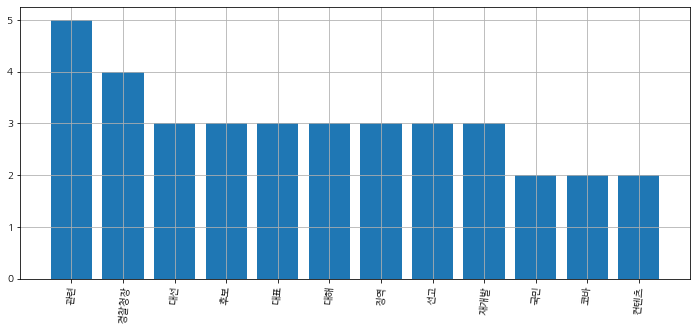

In [ ]:
plt.figure(figsize=(12,5))
plt.xlabel='키워드'
plt.ylabel='빈도수'
plt.grid(True)

plt.bar(range(len(word_count4)), word_count4.values())
plt.xticks(range(len(word_count4)), word_count4.keys(), rotation ='85')
plt.show()